In [2]:
pip install imbalanced-learn


[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Import des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV

In [4]:
train_data= pd.read_csv("train.csv")
train_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51.0,1.0,1.0,125.0,213.0,0.0,2.0,125.0,1.0,1.4,1.0,1.0,3.0,0
1,54.0,1.0,3.0,120.0,237.0,0.0,0.0,150.0,1.0,1.5,-9.0,-9.0,7.0,2
2,63.0,1.0,4.0,140,0,?,2.0,149,0,2,1,?,?,2
3,52.0,0.0,2.0,140.0,-9.0,0.0,0.0,140.0,0.0,0.0,-9.0,-9.0,-9.0,0
4,55.0,1.0,4.0,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,46.0,1.0,3.0,120.0,230.0,0.0,0.0,150.0,0.0,0.0,-9.0,-9.0,-9.0,0
728,62.0,1.0,3.0,?,204,0,1.0,?,?,?,?,?,?,1
729,43.0,0.0,3.0,122.0,213.0,0.0,0.0,165.0,0.0,0.2,2.0,0.0,3.0,0
730,68.0,1.0,3.0,150,195,1,0.0,132,0,0,?,?,6,1


# Analyse Exploratoire des données

In [4]:
train_data.describe()

,age,sex,cp,restecg,label
count,732.000000,732.000000,732.000000,732.000000,732.000000
mean,53.364754,0.789617,3.250000,0.602459,1.132514
std,9.306868,0.407859,0.923363,0.802966,1.257615
min,28.000000,0.000000,1.000000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,0.000000,0.000000
50%,54.000000,1.000000,4.000000,0.000000,1.000000
75%,60.000000,1.000000,4.000000,1.000000,2.000000
max,76.000000,1.000000,4.000000,2.000000,4.000000


In [5]:
train_data["label"].value_counts()

label
0    327
1    156
2    108
3    107
4     34
Name: count, dtype: int64

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       732 non-null    float64
 1   sex       732 non-null    float64
 2   cp        732 non-null    float64
 3   trestbps  732 non-null    object 
 4   chol      732 non-null    object 
 5   fbs       732 non-null    object 
 6   restecg   732 non-null    float64
 7   thalach   732 non-null    object 
 8   exang     732 non-null    object 
 9   oldpeak   732 non-null    object 
 10  slope     732 non-null    object 
 11  ca        732 non-null    object 
 12  thal      732 non-null    object 
 13  label     732 non-null    int64  
dtypes: float64(4), int64(1), object(9)
memory usage: 80.2+ KB


On remarque que certaines variables ne sont pas stockées dans le bon format. Par exemple, il y a des variables de type numérique comme 'trestbps', 'chol','fbs', 'thalach', 'exang', 'oldpeak', 'slope','ca', 'thal' qui sont stockées dans le format 'object' (format des chaînes de caractères). En se basant sur la description des données, nous allons convertir les types de données dans le format approprié pour chaque colonne.

# on traitera le bon format juste après avoir regler le problème des valeurs manquantes et les valeurs mal stockées

# Nettoyage des données

- ❖ GESTION DES VALEURS MANQUANTES
- Il y a des valeurs manquantes représentées par des *"?"* dans les données. Comment gérer ces données manquantes ?

In [5]:
#Remplacement de "?" par NaN
train_data.replace("?", np.nan, inplace = True)
#Evaluation du nombre de valeurs manquantes par colonne
train_data.isnull().sum()

age           0
sex           0
cp            0
trestbps     47
chol          5
fbs          58
restecg       0
thalach      44
exang        44
oldpeak      49
slope        95
ca          249
thal        169
label         0
dtype: int64

In [7]:
# Visualition de l"entete de notre base de données
train_data.head(50)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51.0,1.0,1.0,125.0,213.0,0.0,2.0,125.0,1.0,1.4,1.0,1.0,3.0,0
1,54.0,1.0,3.0,120.0,237.0,0.0,0.0,150.0,1.0,1.5,-9.0,-9.0,7.0,2
2,63.0,1.0,4.0,140,0,NaN,2.0,149,0,2,1,NaN,NaN,2
3,52.0,0.0,2.0,140.0,-9.0,0.0,0.0,140.0,0.0,0.0,-9.0,-9.0,-9.0,0
4,55.0,1.0,4.0,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,3
5,44.0,1.0,4.0,120.0,169.0,0.0,0.0,144.0,1.0,2.8,3.0,0.0,6.0,2
6,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
7,62.0,1.0,4.0,135,297,0,0.0,130,1,1,2,NaN,NaN,2
8,68.0,1.0,4.0,135,0,0,1.0,120,1,0,1,NaN,7,3
9,50.0,1.0,4.0,140.0,231.0,0.0,1.0,140.0,1.0,5.0,2.0,-9.0,-9.0,4


In [6]:
#Imputation par la mediane des colonnes trestbps, chol,fbs,  thalach, exang, oldpeak, slope,ca, thals
import numpy as np

def imput_median(x):
    median = x.median()
    return x.replace(np.nan, median)

for colonne in ['trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']:
    train_data[colonne] = imput_median(train_data[colonne])


In [9]:
train_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
label       0
dtype: int64

In [10]:
train_data.dtypes

age         float64
sex         float64
cp          float64
trestbps     object
chol         object
fbs          object
restecg     float64
thalach      object
exang        object
oldpeak      object
slope        object
ca           object
thal         object
label         int64
dtype: object

In [7]:
# Fonction pour convertir les colonnes en numérique avec gestion des erreurs
def convert_to_numeric(data, columns):
    for col in columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')

# Appliquer la conversion
cols_to_convert = ['trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
convert_to_numeric(train_data, cols_to_convert)

# Vérifier si la conversion a fonctionné
print(train_data.dtypes)


age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
label         int64
dtype: object


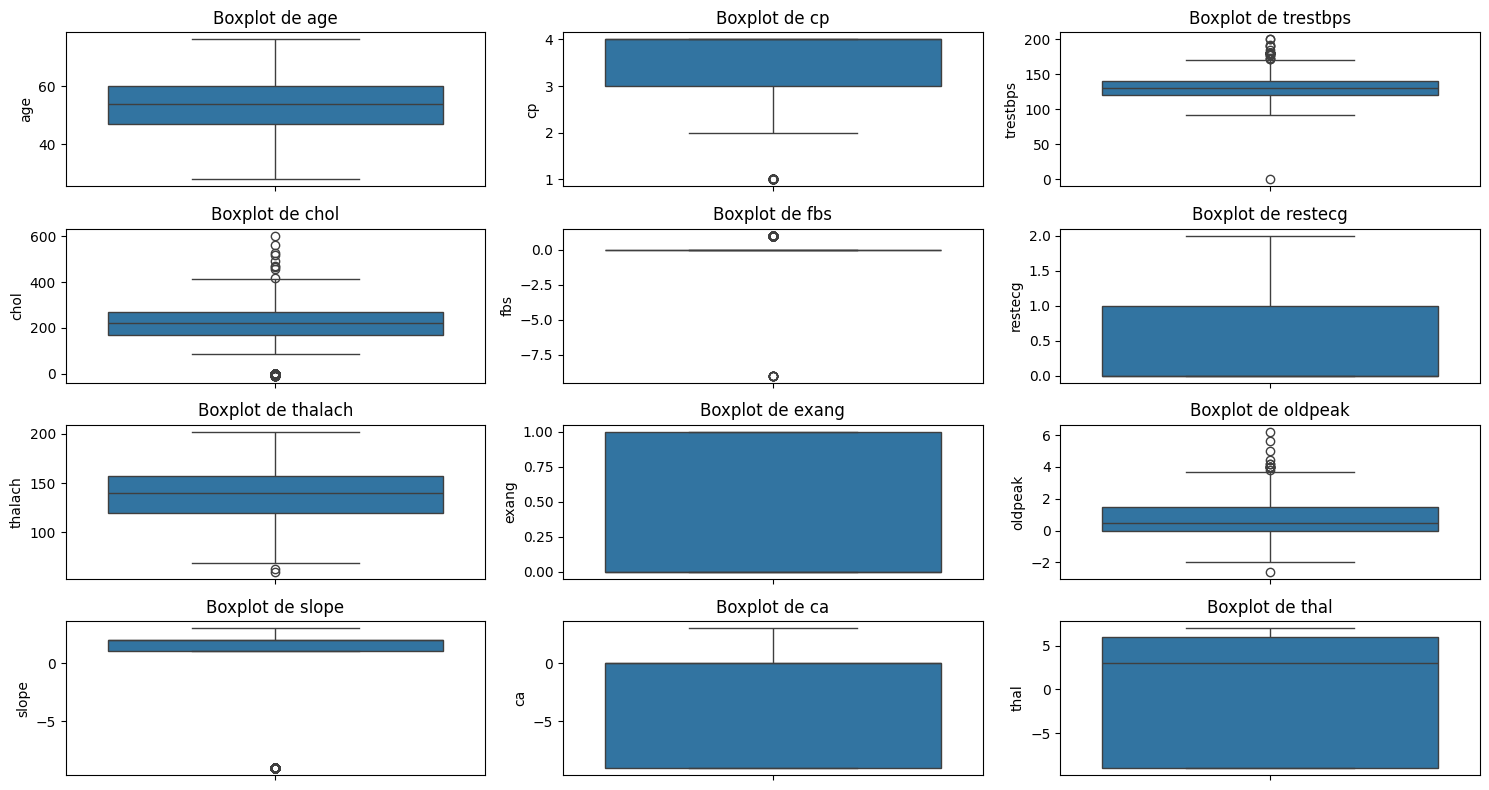

In [8]:
# Liste des colonnes pour lesquelles on veut créer les boxplots
cols = [
    'age',  
    'cp', 
    'trestbps', 
    'chol', 
    'fbs',
    'restecg',
                                'thalach','exang', 'oldpeak','slope','ca','thal'
]

# Définir la taille de la figure pour afficher plusieurs plots
plt.figure(figsize=(15, 8))

# Boucle sur chaque colonne dans la liste des colonnes à visualiser
for i, col in enumerate(cols):
    plt.subplot(4, 3, i + 1)  # Créer un subplot avec 2 lignes et 3 colonnes
    sns.boxplot(data=train_data[col])  # Créer le boxplot pour la colonne
    plt.title(f'Boxplot de {col}')  # Ajouter un titre pour chaque boxplot

# Ajuster l'espacement entre les plots
plt.tight_layout()
plt.show()


### Nous constatons visuellement des putliers sur les  colonnes suivantes : sex	cp	trestbps	chol	fbs		thalach		oldpeak	slope	

# On refait une résumé des données pour une apperçue de leurs réartition

In [12]:
train_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,53.364754,0.789617,3.250000,131.848361,195.539617,0.054645,0.602459,138.244536,0.363388,0.855738,-0.431694,-2.588798,0.579235,1.132514
std,9.306868,0.407859,0.923363,18.582024,113.539135,1.018176,0.802966,25.173848,0.481304,1.079232,4.418526,4.387401,6.280537,1.257615
min,28.000000,0.000000,1.000000,0.000000,-9.000000,-9.000000,0.000000,60.000000,0.000000,-2.600000,-9.000000,-9.000000,-9.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,168.750000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,-9.000000,-9.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,222.000000,0.000000,0.000000,140.000000,0.000000,0.500000,2.000000,0.000000,3.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,267.000000,0.000000,1.000000,157.000000,1.000000,1.500000,2.000000,0.000000,6.000000,2.000000
max,76.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


# On voit bien que certaines variables comme 'chol','fbs','slope' ont des valeurs abbérentes à corriger nous allons les imputées par la médiane

In [9]:
# Fonction pour détecter les outliers en utilisant l'IQR (Interquartile Range)
def detect_and_replace_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Calculer la médiane de la colonne
    median_value = data[column].median()

    # Remplacer les outliers par la médiane
    data[column] = data[column].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

# Liste des colonnes où vous voulez détecter et remplacer les outliers
cols = ['sex', 'cp', 'trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'slope']

In [10]:

# Appliquer la détection et remplacement des outliers pour chaque colonne
for col in cols:
    detect_and_replace_outliers_iqr(train_data, col)

# Afficher le DataFrame pour vérifier que les outliers ont bien été remplacés
print(train_data.head())


    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  51.0  1.0  4.0     125.0  213.0  0.0      2.0    125.0    1.0      1.4   
1  54.0  1.0  3.0     120.0  237.0  0.0      0.0    150.0    1.0      1.5   
2  63.0  1.0  4.0     140.0  222.0  0.0      2.0    149.0    0.0      2.0   
3  52.0  1.0  2.0     140.0  222.0  0.0      0.0    140.0    0.0      0.0   
4  55.0  1.0  4.0     140.0  217.0  0.0      0.0    111.0    1.0      0.5   

   slope   ca  thal  label  
0    1.0  1.0   3.0      0  
1    2.0 -9.0   7.0      2  
2    1.0  0.0   3.0      2  
3    2.0 -9.0  -9.0      0  
4    3.0  0.0   7.0      3  


In [15]:
train_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
count,732.000000,732.0,732.000000,732.000000,732.000000,732.0,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,53.364754,1.0,3.393443,130.387978,238.094262,0.0,0.602459,138.459016,0.363388,0.790437,1.852459,-2.588798,0.579235,1.132514
std,9.306868,0.0,0.785199,15.435042,45.435791,0.0,0.802966,24.850848,0.481304,0.955203,0.512585,4.387401,6.280537,1.257615
min,28.000000,1.0,2.000000,92.000000,85.000000,0.0,0.000000,69.000000,0.000000,-2.000000,1.000000,-9.000000,-9.000000,0.000000
25%,47.000000,1.0,3.000000,120.000000,216.000000,0.0,0.000000,120.000000,0.000000,0.000000,2.000000,-9.000000,-9.000000,0.000000
50%,54.000000,1.0,4.000000,130.000000,222.000000,0.0,0.000000,140.000000,0.000000,0.500000,2.000000,0.000000,3.000000,1.000000
75%,60.000000,1.0,4.000000,140.000000,265.000000,0.0,1.000000,157.000000,1.000000,1.500000,2.000000,0.000000,6.000000,2.000000
max,76.000000,1.0,4.000000,170.000000,412.000000,0.0,2.000000,202.000000,1.000000,3.700000,3.000000,3.000000,7.000000,4.000000


In [11]:
corr = train_data.corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
age,1.000000,NaN,0.223504,0.249181,0.079401,NaN,0.179969,-0.334105,0.136198,0.219796,0.057751,0.446791,0.385348,0.264917
sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cp,0.223504,NaN,1.000000,0.063578,0.042327,NaN,0.079177,-0.344520,0.381324,0.286091,0.127430,0.224190,0.256922,0.419530
trestbps,0.249181,NaN,0.063578,1.000000,0.055287,NaN,0.078246,-0.122301,0.123707,0.151975,0.038541,-0.015611,-0.019989,0.153940
chol,0.079401,NaN,0.042327,0.055287,1.000000,NaN,0.108080,0.025336,0.102399,0.077047,-0.020783,-0.035275,-0.056069,0.077828
fbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restecg,0.179969,NaN,0.079177,0.078246,0.108080,NaN,1.000000,0.066881,-0.007979,0.093133,-0.049637,0.345852,0.293928,0.049529
thalach,-0.334105,NaN,-0.344520,-0.122301,0.025336,NaN,0.066881,1.000000,-0.338554,-0.160573,-0.305901,-0.027103,-0.039403,-0.387447
exang,0.136198,NaN,0.381324,0.123707,0.102399,NaN,-0.007979,-0.338554,1.000000,0.389035,0.195436,0.078140,0.131657,0.392684
oldpeak,0.219796,NaN,0.286091,0.151975,0.077047,NaN,0.093133,-0.160573,0.389035,1.000000,0.184590,0.182985,0.175253,0.397124


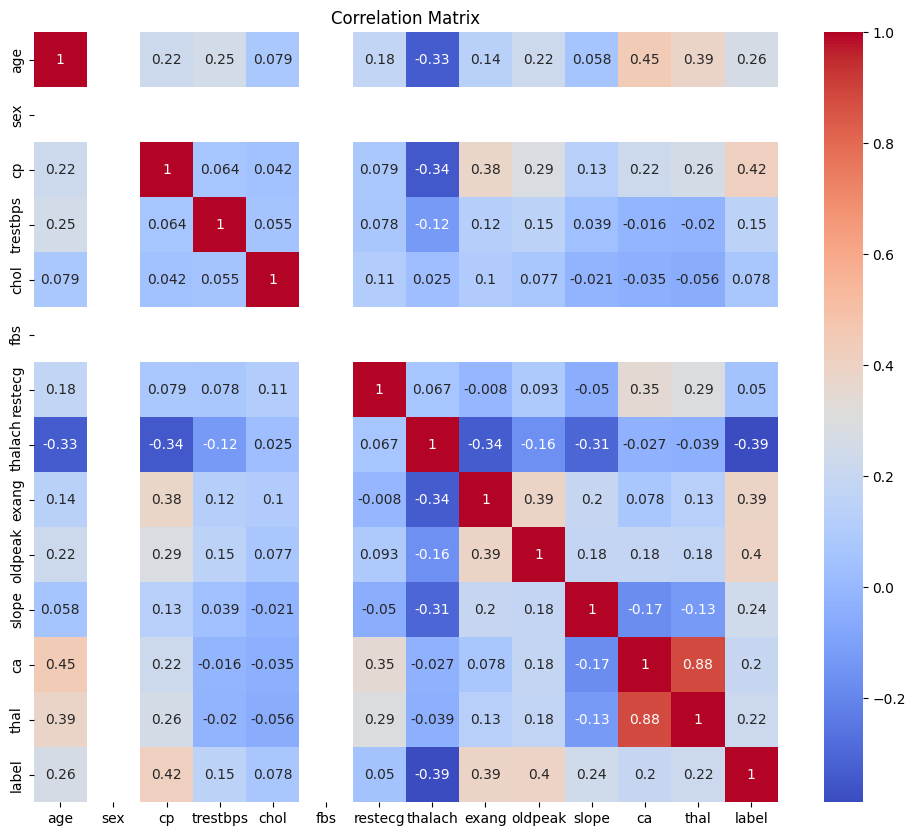

In [15]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [12]:
# Séparation des features et de la target
X = train_data.drop(columns=['label'])
y = train_data['label']

In [13]:
# 1. Rééquilibrage des classes avec SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [14]:
# 2. Séparation des ensembles en : Entraînement (60%), Validation (20%), Test (20%)
# Séparation en 80% (train + val) et 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [15]:
# Séparation de l'ensemble train_val en 70% train et 30% validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

In [16]:

# Définir la grille des hyperparamètres pour la recherche
parameters = {
    'C': [0.1, 1, 10,100],
    'gamma': [0.001, 0.01, 0.1],
    'kernel': ['rbf','linear']
}

In [17]:
# 4. Choix du modèle et optimisation des hyperparamètres avec GridSearchCV
grid_search = GridSearchCV(SVC(), parameters, cv=5, scoring='f1_weighted')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1],
                         'kernel': ['rbf', 'linear']},
             scoring='f1_weighted')

In [18]:
# Meilleurs hyperparamètres trouvés
best_params = grid_search.best_params_
print("Meilleurs hyperparamètres:", best_params)

Meilleurs hyperparamètres: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [19]:
# 5. Entraînement du modèle avec les meilleurs hyperparamètres
best_svc = SVC(**best_params)
best_svc.fit(X_train, y_train)

SVC(C=10, gamma=0.01)

In [20]:
# 6. Évaluation du modèle sur l'ensemble de test
y_pred_test = best_svc.predict(X_test)
f1_test = f1_score(y_test, y_pred_test, average='weighted')
print("F1 Score sur l'ensemble de test:", f1_test)

F1 Score sur l'ensemble de test: 0.7599116233654618


In [21]:
# 7. Évaluation du modèle sur l'ensemble de validation
y_pred_val = best_svc.predict(X_val)
f1_val = f1_score(y_val, y_pred_val, average='weighted')
print("F1 Score sur l'ensemble de validation:", f1_val)

F1 Score sur l'ensemble de validation: 0.7963084381758222


In [ ]:

# 8. Afficher le rapport de classification
print("\nRapport de classification sur l'ensemble de test :")
print(classification_report(y_test, y_pred_test))


Rapport de classification sur l'ensemble de test :


NameError: name 'classification_report' is not defined

In [23]:
pip install joblib


[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:

# 9. Enregistrement du meilleur modèle
joblib.dump(best_svc, 'meilleur_modele_svm.pkl')

NameError: name 'joblib' is not defined